# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Aug 27 23:02:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:3B:00.0 Off |                  N/A |
| 28%   41C    P8     6W / 250W |   1046MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:5E:00.0 Off |                  N/A |
| 29%   43C    P8    24W / 250W |     11MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.12.1+cu102


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

There are several ways to deal with underfitting where the model could not converge/learn on data so we need prevent overfitting in order to increase the model's predictive power... 
1. Adding more layers or units to your model or increase the coplexity of the model. In this we are giving the model a chance to learn generalizable pattern in the training data.
2. Increase the training time (number of epochs) could help in case the initial training schedule didn't help.
3. By using the transfer learning where leverging the pretrained weights on other datasets. 

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [35]:
# 1. Get data
from pathlib import Path
data_path = Path("data/")

image_path = data_path / "pizza_steak_sushi_20_percent"


In [36]:
# Setup train and testing paths
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [37]:
image_path.glob

<bound method Path.glob of PosixPath('data/pizza_steak_sushi_20_percent')>

In [40]:
# Visualize an image
import random
from PIL import Image
# set seed
random.seed(42)

# Get image path lists
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

[PosixPath('data/pizza_steak_sushi_20_percent/train/steak/2928643.jpg'), PosixPath('data/pizza_steak_sushi_20_percent/train/steak/3113772.jpg'), PosixPath('data/pizza_steak_sushi_20_percent/train/steak/2880035.jpg')]


In [41]:
# pick a random image path
random_image_paths = random.choice(image_path_list)
print(random_image_paths)

data/pizza_steak_sushi_20_percent/train/steak/2216146.jpg


In [42]:
# Get image class fro the path names
image_class = random_image_paths.parent.stem
print(image_class)

steak


In [43]:
# Open an image using PIL
img = Image.open(random_image_paths)

Random image paths: data/pizza_steak_sushi_20_percent/train/steak/2216146.jpg 
 Image class: steak 
 Image height: 384 
 Image width: 512


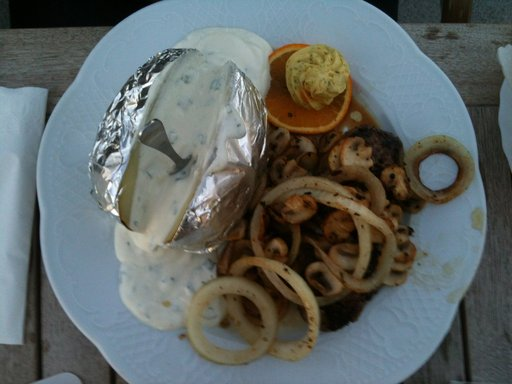

In [44]:
# print metadata 
print(f"Random image paths: {random_image_paths} \n Image class: {image_class} \n Image height: {img.height} \n Image width: {img.width}")
img

(-0.5, 510.5, 511.5, -0.5)

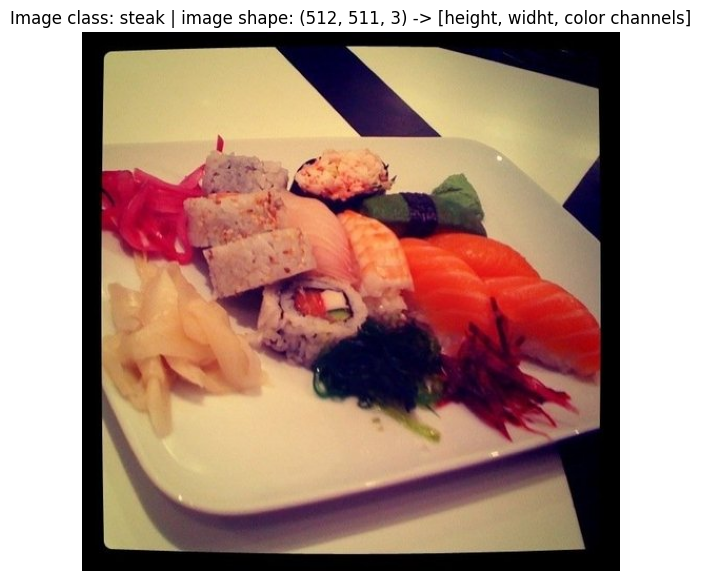

In [45]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Opent the image using PIL
img = Image.open("/home/mhamdan/DeepLearning_PyTorch_2022/data/pizza_steak_sushi_20_percent/train/sushi/1129338.jpg")
# Convert the image into an numpy array
img_as_array = np.asarray(img)

#plot the image - create a figure
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | image shape: {img_as_array.shape} -> [height, widht, color channels]")
plt.axis(False)


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [46]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader


In [47]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [48]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Pick random images and plot them"""
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nsize{f.size}")
            ax[0].axis("off")
            
            # Transform and plot image permute() the image to be (H,W, C) to compatible with matplotlib
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=18)



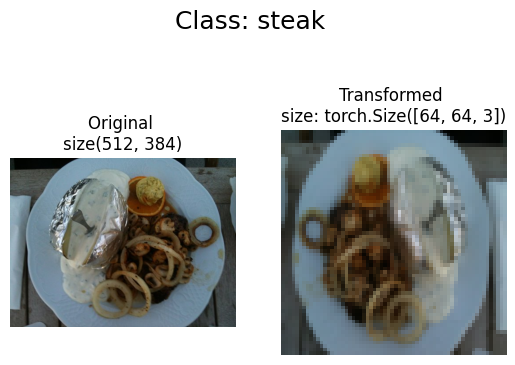

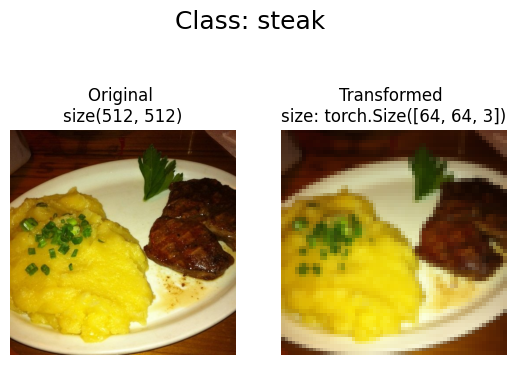

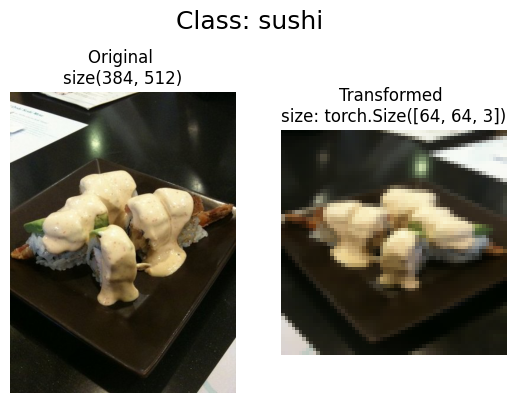

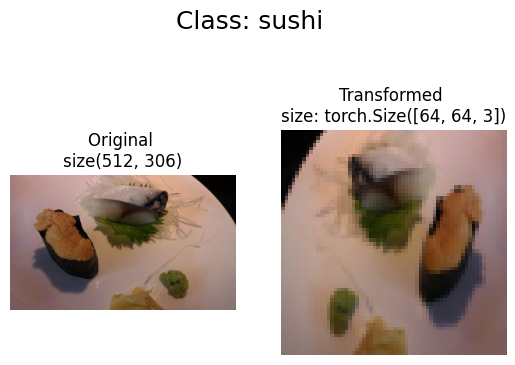

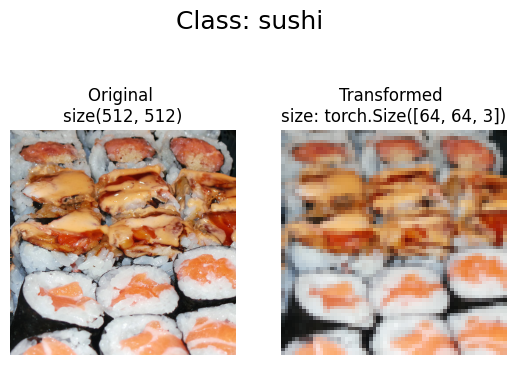

In [49]:
plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=5)

### Load image data using `ImageFolder`

In [50]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform,
                                target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [51]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [52]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [53]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(450, 150)

In [107]:
# Turn train and test Datasets into DataLoaders
import os

BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ff5330f71f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff4a6fa54c0>)

In [108]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(450, 150)

In [109]:
#grab an image from our train dataloader
img, label = next(iter(train_dataloader))


print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width] \n Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width] 
 Label shape: torch.Size([1])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [141]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        
        )
#         self.conv_block_3 = nn.Sequential(
#             nn.Conv2d(in_channels=hidden_units,
#                      out_channels=hidden_units,
#                      kernel_size=3,
#                      stride=1,
#                      padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                      out_channels=hidden_units,
#                      kernel_size=3,
#                      stride=1,
#                      padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
        
#         )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16,
                     out_features=output_shape)
        
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        #x = self.conv_block_3(x)
        #print(f"Layer 4 shape: {x.shape}")
        x = self.classifier(x)
        
        return x

In [142]:
# instantiate a model from our create TinyVGG
model_1 = TinyVGG(input_shape=3, 
                 hidden_units=16,
                 output_shape=len(class_names)).to(device)

In [143]:
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=3, bias=True)
  )
)

In [144]:
# To set the proper shape on the last layer (Linear layer - after flatting) using a dummpy tensor
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_1(dummy_x.to(device)) 

tensor([[0.0686, 0.0102, 0.0036]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [145]:
def train_step1(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
              device=device):
    # Put the model in train mode
      model.train()

      # Setup train loss and train accuracy values
      train_loss, train_acc = 0, 0

      # Loop through data loader and data batches
      for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            y_pred = model(X)
            # 2. Calculate and accumulate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()
            # 3. Optimizer zero grad 
            optimizer.zero_grad()
            # 4. Loss backward 
            loss.backward()
            # 5. Optimizer step
            optimizer.step()
            
            # Calculate and accumualte accuracy metric across all batches
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1))
            train_acc += (y_pred_class == y).sum().item()/len(y_pred)
            
    # Adjust metrics to get average loss and average accuracy per batch
      train_loss /= len(dataloader)
      train_acc /= len(dataloader)
      return train_loss, train_acc
            
        

In [146]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
              device=device):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device) 

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [147]:
def test_step1(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, 
             device=device):
    # Put model in eval mode
      model.eval()

      # Setup the test loss and test accuracy values
      test_loss, test_acc = 0, 0

      # Turn on inference context manager
      with torch.inference_mode():
            
            
            

        # Loop through DataLoader batches
            for batch, (X, y) in enumerate(dataloader):
                
                
          # Send data to target device
                X, y = X.to(device), y.to(device)

          # 1. Forward pass
                test_pred = model(X)

          # 2. Calculuate and accumulate loss
                loss = loss_fn(test_pred, y)
                test_loss += loss.item()

          # Calculate and accumulate accuracy
                test_pred_labels = test_pred.argmax(dim=1)
                test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    
            # Adjust metrics to get average loss and accuracy per batch
            test_loss /= len(dataloader)
            test_acc /= len(dataloader)
            return test_loss, test_acc


In [132]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
             device=device):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [133]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
         device=device):
    
# Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                      device=device)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                   device=device)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results
    
  
  

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [134]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                             lr=0.001)

model_with_5_epochs_results = train(model=model_1,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = 5,
                                   device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1012 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3022 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067


In [124]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                             lr=0.001)

model_with_20_epochs_results = train(model=model_1,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = 20,
                                   device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1012 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1008 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3022 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3311 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 7 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1011 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.0990 | train_acc: 0.3267 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 10 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 11 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 12 | train_l

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                             lr=0.001)
model_with_50_epochs_results = train(model=model_1,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = 50,
                                   device=device)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                 hidden_units=20,
                 output_shape=len(class_names)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                            lr=0.001)

model_2_with_20_epochs_results = train(model_2,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = 20,
                                   device=device)
                                      


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

In [ ]:
# See how many images we have
walk_through_dir(image_path)

Excellent, we now have double the training and testing images... 

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(root=train_data_20_percent_path,
                                   transform=simple_transform)
test_data_20_percent = ImageFolder(root=test_data_20_percent_path,
                                  transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)
test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                                       batch_size = BATCH_SIZE,
                                       num_workers=NUM_WORKERS,
                                       shuffle=False)


In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3,
                 hidden_units=20,
                 output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                            lr=0.001)
NUM_EPOCHS = 20

model_3_with_20_epochs_results = train(model=model_3,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = NUM_EPOCHS,
                                   device=device)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [ ]:
# Get a custom image
custom_image = "pizza_Homemade.jpeg"
with open("pizza_Homemade.jpeg", "wb") as f:
  request = requests.get("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-homemade-pizza-horizontal-1542312378.png?crop=1.00xw:1.00xh;0,0&resize=980:*")
  f.write(request.content)

In [ ]:
import torchvision 
img = torchvision.io.read_image(custom_image)

In [ ]:
img

In [ ]:
# plot hte image 
plt.figure(figsize=(10, 7)
          )
plt.imshow(img.permute(1, 2, 0))
plt.axis(False)

In [ ]:
# turn model 3 into eval mode to make prediciton on the image
model_3.eval()

In [ ]:
with torch.inference_mode():
    # normalize the image values to 0 and 1
    img = img / 255.0
    
    # resize the image to fit with model data was trained on 64 * 64 height and width respectively 
    resize = transforms.Resize(size=(64, 64))
    img = resize(img)
    
    # Unsqueeze the image to add a batch (to an image shape to fit the model's tensor format )
    batch = img.unsqueeze(0)
    # add the batched image to device
    batched_image = batch.to(device)
    
    # Predict an image ..
    test_pred = model_3(batched_image)
    
    
    # from pred logits -> pred probs -> to pred labels
    # we can use softmax with argmax as in : torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
    # or only argmax is enough and hence yeilds the same results ...
    pred_label = torch.argmax(test_pred, dim=1)
    
    
    

In [ ]:
# plot the predicted image 
plt.imshow(img.permute(1,2,0)) # Height, width, Color_channel .. a

In [135]:
# plot the predicted image 
plt.imshow(img.permute(1,2,0)) # Height, width, Color_channel .. a

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0992 | train_acc: 0.3333 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1012 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1008 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3089 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3333 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 7 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1011 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.0990 | train_acc: 0.3244 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 10 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1009 | test_acc: 0.3067
Epoch: 11 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [148]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                 hidden_units=20,
                 output_shape=len(class_names)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                            lr=0.001)

model_2_with_20_epochs_results = train(model_2,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = 20,
                                   device=device)
                                      


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1214 | train_acc: 0.3844 | test_loss: 1.0557 | test_acc: 0.5333
Epoch: 2 | train_loss: 0.9810 | train_acc: 0.5667 | test_loss: 0.8995 | test_acc: 0.6000
Epoch: 3 | train_loss: 0.9122 | train_acc: 0.5867 | test_loss: 0.8949 | test_acc: 0.6467
Epoch: 4 | train_loss: 0.9010 | train_acc: 0.5689 | test_loss: 0.8671 | test_acc: 0.6333
Epoch: 5 | train_loss: 0.8598 | train_acc: 0.6178 | test_loss: 0.8916 | test_acc: 0.5733
Epoch: 6 | train_loss: 0.8416 | train_acc: 0.6267 | test_loss: 0.8808 | test_acc: 0.6133
Epoch: 7 | train_loss: 0.8344 | train_acc: 0.5956 | test_loss: 0.8766 | test_acc: 0.5600
Epoch: 8 | train_loss: 0.8218 | train_acc: 0.6511 | test_loss: 0.8144 | test_acc: 0.6733
Epoch: 9 | train_loss: 0.7935 | train_acc: 0.6311 | test_loss: 0.8361 | test_acc: 0.6267
Epoch: 10 | train_loss: 0.7920 | train_acc: 0.6711 | test_loss: 0.8607 | test_acc: 0.6333
Epoch: 11 | train_loss: 0.7593 | train_acc: 0.6556 | test_loss: 0.8263 | test_acc: 0.6600
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [149]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [150]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.


Excellent, we now have double the training and testing images... 

In [152]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [156]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(root=train_data_20_percent_path,
                                   transform=simple_transform)
test_data_20_percent = ImageFolder(root=test_data_20_percent_path,
                                  transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)
test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                                       batch_size = BATCH_SIZE,
                                       num_workers=NUM_WORKERS,
                                       shuffle=False)


In [158]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3,
                 hidden_units=20,
                 output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                            lr=0.001)
NUM_EPOCHS = 20

model_3_with_20_epochs_results = train(model=model_3,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs = NUM_EPOCHS,
                                   device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1087 | train_acc: 0.3489 | test_loss: 1.0487 | test_acc: 0.6133
Epoch: 2 | train_loss: 0.9855 | train_acc: 0.5356 | test_loss: 0.9109 | test_acc: 0.6067
Epoch: 3 | train_loss: 0.9095 | train_acc: 0.5844 | test_loss: 0.8915 | test_acc: 0.6267
Epoch: 4 | train_loss: 0.8833 | train_acc: 0.6022 | test_loss: 0.8838 | test_acc: 0.6133
Epoch: 5 | train_loss: 0.8483 | train_acc: 0.6200 | test_loss: 0.9269 | test_acc: 0.5600
Epoch: 6 | train_loss: 0.8461 | train_acc: 0.6289 | test_loss: 0.8820 | test_acc: 0.5867
Epoch: 7 | train_loss: 0.8150 | train_acc: 0.6067 | test_loss: 0.8880 | test_acc: 0.5867
Epoch: 8 | train_loss: 0.7634 | train_acc: 0.6600 | test_loss: 0.8345 | test_acc: 0.6200
Epoch: 9 | train_loss: 0.7237 | train_acc: 0.6822 | test_loss: 0.8616 | test_acc: 0.6400
Epoch: 10 | train_loss: 0.7398 | train_acc: 0.7022 | test_loss: 0.8864 | test_acc: 0.6533
Epoch: 11 | train_loss: 0.6814 | train_acc: 0.7111 | test_loss: 0.8425 | test_acc: 0.6533
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [161]:
# Get a custom image
custom_image = "pizza_Homemade.jpeg"
with open("pizza_Homemade.jpeg", "wb") as f:
  request = requests.get("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-homemade-pizza-horizontal-1542312378.png?crop=1.00xw:1.00xh;0,0&resize=980:*")
  f.write(request.content)

In [163]:
import torchvision 
img = torchvision.io.read_image(custom_image)

In [164]:
img

tensor([[[202, 202, 202,  ..., 224, 227, 226],
         [202, 202, 202,  ..., 226, 226, 226],
         [202, 202, 202,  ..., 229, 228, 230],
         ...,
         [180, 180, 182,  ..., 151, 149, 149],
         [182, 182, 182,  ..., 150, 150, 151],
         [182, 182, 182,  ..., 149, 150, 151]],

        [[207, 207, 207,  ..., 158, 161, 162],
         [207, 207, 207,  ..., 166, 167, 169],
         [207, 207, 207,  ..., 180, 179, 180],
         ...,
         [189, 189, 191,  ..., 160, 158, 158],
         [191, 191, 191,  ..., 159, 159, 160],
         [191, 191, 191,  ..., 158, 159, 160]],

        [[213, 213, 213,  ..., 112, 121, 121],
         [213, 213, 213,  ..., 133, 129, 131],
         [213, 213, 213,  ..., 149, 146, 147],
         ...,
         [196, 197, 200,  ..., 169, 164, 162],
         [200, 200, 200,  ..., 168, 166, 165],
         [200, 200, 200,  ..., 167, 168, 168]]], dtype=torch.uint8)

(-0.5, 979.5, 653.5, -0.5)

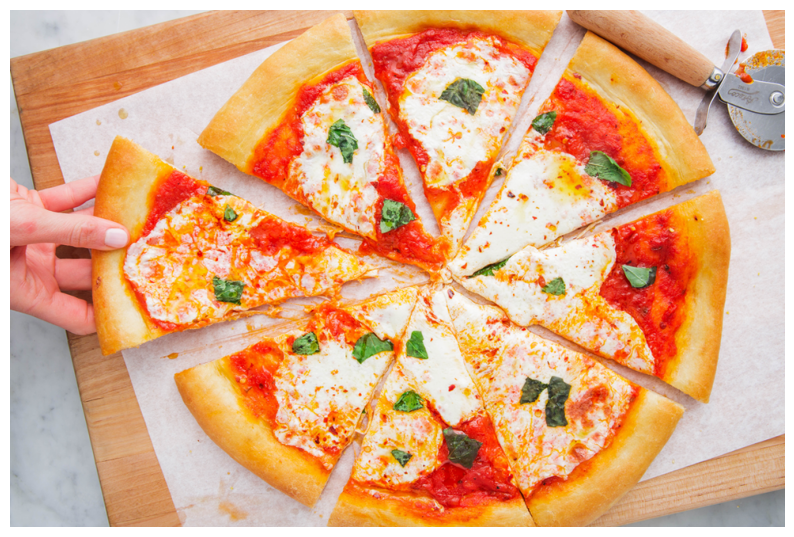

In [165]:
# plot hte image 
plt.figure(figsize=(10, 7)
          )
plt.imshow(img.permute(1, 2, 0))
plt.axis(False)

In [166]:
# turn model 3 into eval mode to make prediciton on the image
model_3.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [168]:
with torch.inference_mode():
    # normalize the image values to 0 and 1
    img = img / 255.0
    
    # resize the image to fit with model data was trained on 64 * 64 height and width respectively 
    resize = transforms.Resize(size=(64, 64))
    img = resize(img)
    
    # Unsqueeze the image to add a batch (to an image shape to fit the model's tensor format )
    batch = img.unsqueeze(0)
    # add the batched image to device
    batched_image = batch.to(device)
    
    # Predict an image ..
    test_pred = model_3(batched_image)
    
    
    # from pred logits -> pred probs -> to pred labels
    # we can use softmax with argmax as in : torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
    # or only argmax is enough and hence yeilds the same results ...
    pred_label = torch.argmax(test_pred, dim=1)
    
    
    

In [ ]:
# plot the predicted image 
plt.imshow(img.permute(1,2,0)) # Height, width, Color_channel .. a